![CA%20Cover%20Sheet%20for%20submissions.jpg](attachment:CA%20Cover%20Sheet%20for%20submissions.jpg)

# Introduction to the project 
Scenario:  
  
You have been retained by a retail company to analyse a dataset based on board games. This analysis will help determine the sales strategy for the company in their upcoming Winter season.   
  
Each answer MUST have a separate visualization that can be easily understood, visually represents the answer, and all data wrangling, analysis, and visualizations must generated using python.  
   
The companies CTO also requires you to rationalize all the decisions that you have made in your report.   
  
This rationalization MUST include your visualization design decisions, how you have engineered the data, feature selection and any other information that you deem relevant.   
  
Requirements  
  
You are required to use the dataset contained within the file “board_games.csv” and then answer the following questions:  



# Part 1: (Column Names are denoted by quotation marks)  
  
•	What are the top 5 “average rated” games?  
•	Is there a correlation between the “users_rated” and the “max_playtime”?  
•	What is the distribution of game categories?  
•	Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?  
•	What are the 3 most common “mechanics” in the dataset?  

### Dataframe Exploration 
<b>Libraries</b> 

I will add the most essential libraries for data manipulation, such as pandas and numpy and data visualisation, such as seaborn and matplotlib. Visualisation packages will allow me to explore data insights. 

The visualisation libraries have slightly different options in visualisation. I will import both of them in case of my convenience to work with the code and broader options in visualisation. I will consider more libraries in later steps. 





In [1]:
#Libraries 
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



In [2]:
#reach to the Google drive 
from google.colab import drive
drive.mount("/content/drive")

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [3]:
import warnings
warnings.filterwarnings('ignore') # We can suppress the warnings

In [4]:
#read the dataset
b_games = pd.read_csv("/content/drive/MyDrive/Data Analytics/Data Visualisation/BoardGame/board_games.csv")
b_games.head()

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195


I will explore data from the table to find shape, data types, missing values, statistical representation of the data. 

In [5]:
b_games.shape

(10532, 22)

In [6]:
b_games.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10532 entries, 0 to 10531
Data columns (total 22 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   game_id         10532 non-null  int64  
 1   description     10532 non-null  object 
 2   image           10531 non-null  object 
 3   max_players     10532 non-null  int64  
 4   max_playtime    10532 non-null  int64  
 5   min_age         10532 non-null  int64  
 6   min_players     10532 non-null  int64  
 7   min_playtime    10532 non-null  int64  
 8   name            10532 non-null  object 
 9   playing_time    10532 non-null  int64  
 10  thumbnail       10531 non-null  object 
 11  year_published  10532 non-null  int64  
 12  artist          7759 non-null   object 
 13  category        10438 non-null  object 
 14  compilation     410 non-null    object 
 15  designer        10406 non-null  object 
 16  expansion       2752 non-null   object 
 17  family          7724 non-null  

In [7]:
b_games.isna().sum()

game_id               0
description           0
image                 1
max_players           0
max_playtime          0
min_age               0
min_players           0
min_playtime          0
name                  0
playing_time          0
thumbnail             1
year_published        0
artist             2773
category             94
compilation       10122
designer            126
expansion          7780
family             2808
mechanic            950
publisher             3
average_rating        0
users_rated           0
dtype: int64

In [8]:
b_games.describe()

,game_id,max_players,max_playtime,min_age,min_players,min_playtime,playing_time,year_published,average_rating,users_rated
count,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000,10532.000000
mean,62059.203095,5.657330,91.341436,9.714964,2.070547,80.882738,91.341436,2003.070832,6.370856,870.081466
std,66223.716828,18.884403,659.754400,3.451226,0.664394,637.873893,659.754400,12.278296,0.850364,2880.214998
min,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1950.000000,1.384210,50.000000
25%,5444.500000,4.000000,30.000000,8.000000,2.000000,25.000000,30.000000,1998.000000,5.829585,85.000000
50%,28822.500000,4.000000,45.000000,10.000000,2.000000,45.000000,45.000000,2007.000000,6.392965,176.000000
75%,126409.500000,6.000000,90.000000,12.000000,2.000000,90.000000,90.000000,2012.000000,6.942675,518.000000
max,216725.000000,999.000000,60000.000000,42.000000,9.000000,60000.000000,60000.000000,2016.000000,9.003920,67655.000000


The datafrane consist of  22 columns and 10532 rows. 

Data types of the dataset: objects, floats and integers. 

Missing Values: artist - 2773, compilation - 10122, designer - 126, expansion - 7780, family - 2808, mechanic - 950. 


### What are the top 5 “average rated” games?

I will display the game's name and average_rating. From statistical representation, I can see that the average rating range from 1 to 9. The values are represented in decimals.
 
The main task in this stage is to find the top 5 rated games. It means I will be working with two columns which should sort by the average rating of the game. I have two columns involved in the task, I will take an approach by sorting the names by the values of each column. I will use sort_value() function in order to solve the task. This function will place values in descending order.


In [9]:
b_games["average_rating"].sort_values(ascending=False)

8348    9.00392
6392    8.93184
9964    8.84862
8526    8.84603
9675    8.83081
         ...   
4165    2.33940
4965    2.07772
1972    1.96986
1541    1.84598
5234    1.38421
Name: average_rating, Length: 10532, dtype: float64

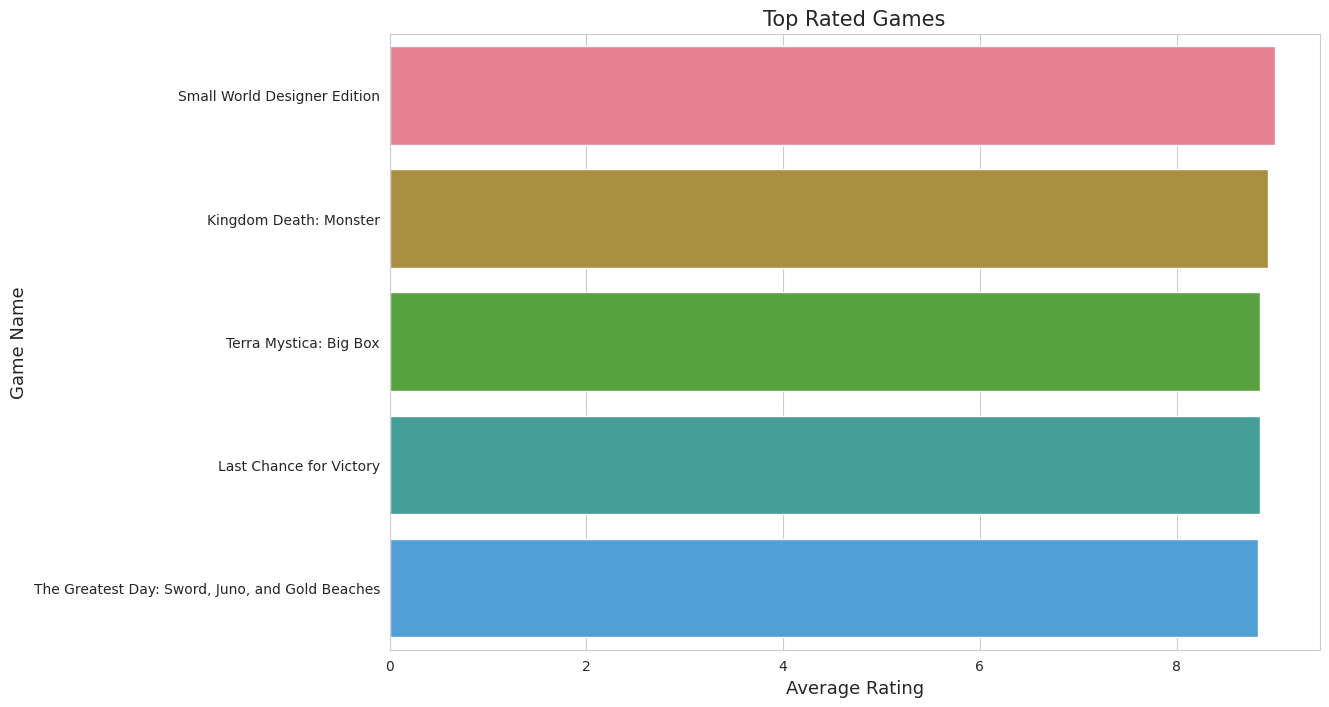

In [10]:
#figure size
plt.figure(figsize = (12,8))

# Sort the data by rating in descending order and select the top names
top_names = b_games.sort_values(by=['average_rating','name'],
            ascending=False, kind="mergesort").drop_duplicates(subset=['name']).head(5)
# Create Style
sns.set_palette("husl")
sns.set_style('whitegrid')


# Create a barplot
sns.barplot(x=top_names['average_rating'],y=top_names['name'], orient='h')
plt.title('Top Rated Games', size = 15)
plt.xlabel('Average Rating', size = 13)
plt.ylabel('Game Name', size = 13 )
# Show the plot
plt.show()

The visualisation displays top 5 games:
1. Small World Designer Edition
2. Kingdome Death: Monster
3. Terra Mysterica: Monster
4. Last Chamce for Victory
5. The Greatest Day: Sword, Juno, and Golden Beaches


### Is there a correlation between the “users_rated” and the “max_playtime”? 

To show a correlation between features I will use a heatmap and linear regression. Both of these techniques are used to display a correlation between 2 or multiple variables.

I will use the seaborn library with regplot() function to create linear regression between two features and heatmap() function to display the correlation between all the features in the data frame. 

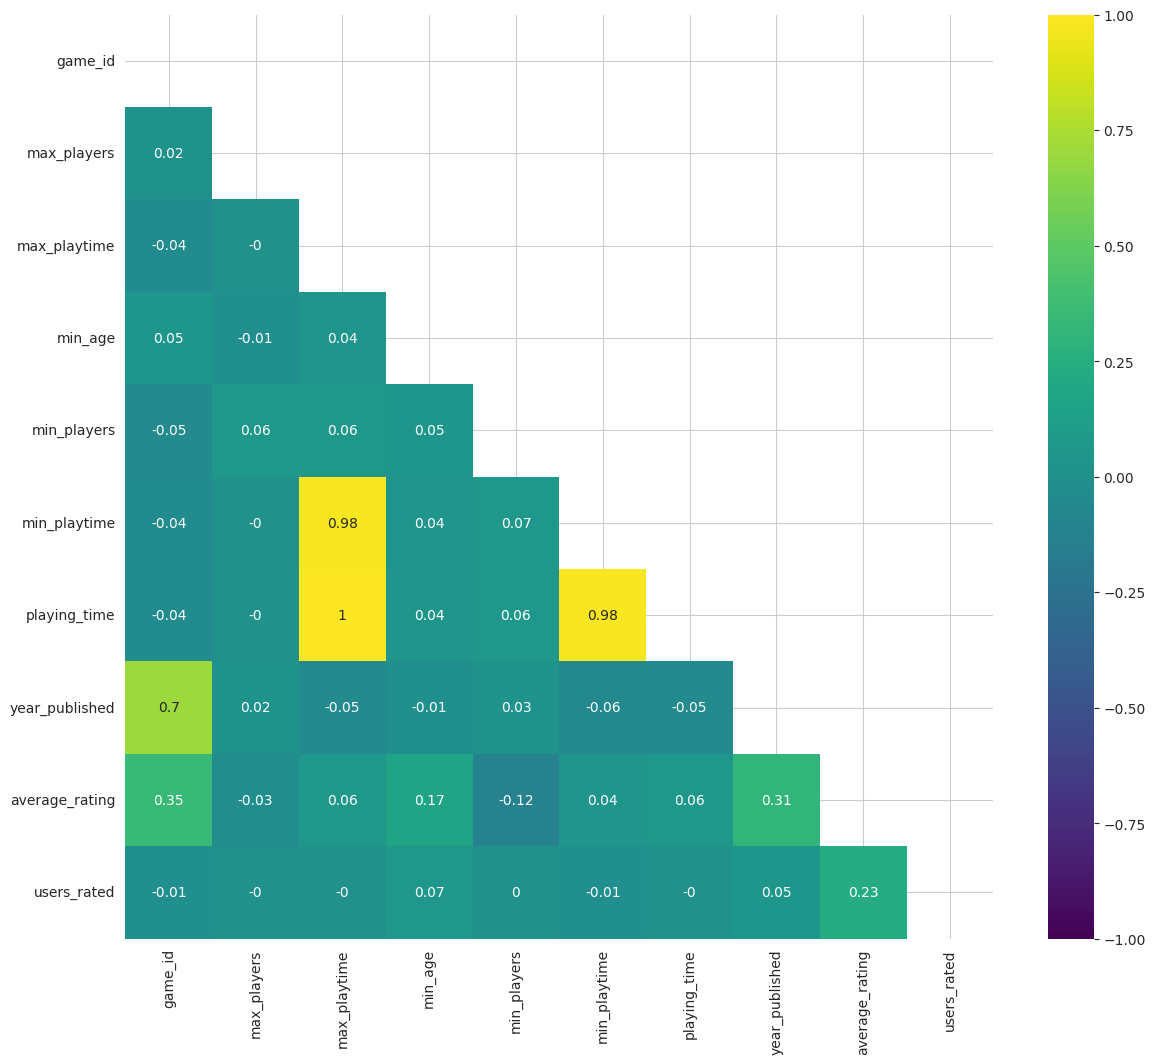

In [11]:
plt.figure(figsize = (14,12))
mask = np.triu(np.ones_like( b_games.corr(method = "pearson"), dtype=np.bool))
dataplot = sns.heatmap(b_games.corr().round(2), mask=mask, vmin=-1, vmax=1, cmap= "viridis",
                       annot=True) 
# displaying heatmap
plt.show()

Linear regression did not show meaningful insights. It proves that linear regression is not the only tool to work with a correlation of two features. 

heatmap() provided a meaningful outcome where it is clear to see that correlation between “users_rated” and the “max_playtime” is zero. So there is no correlation between the features. 

### What is the distribution of game categories?

Distribution of the game will show frequency in each category. I will count the values and sort them. I will also visualise a few categories as an example by using bar charts. It is one of the visualisation techniques for distribution visualisation and count the number of values. I will work just only with one feature on this task.

In [12]:
b_games["category"]

0                     Economic,Negotiation,Political
1                                  Card Game,Fantasy
2                         Abstract Strategy,Medieval
3                                            Ancient
4                                           Economic
                            ...                     
10527                            Vietnam War,Wargame
10528    Card Game,Fantasy,Fighting,Video Game Theme
10529                                      Card Game
10530              Miniatures,Racing,Science Fiction
10531                        Card Game,City Building
Name: category, Length: 10532, dtype: object

In [13]:
value_counts_category = b_games["category"].value_counts().head(5)

In [14]:
value_counts_category

Wargame,World War II    449
Card Game               438
Abstract Strategy       284
Napoleonic,Wargame      124
Economic                116
Name: category, dtype: int64

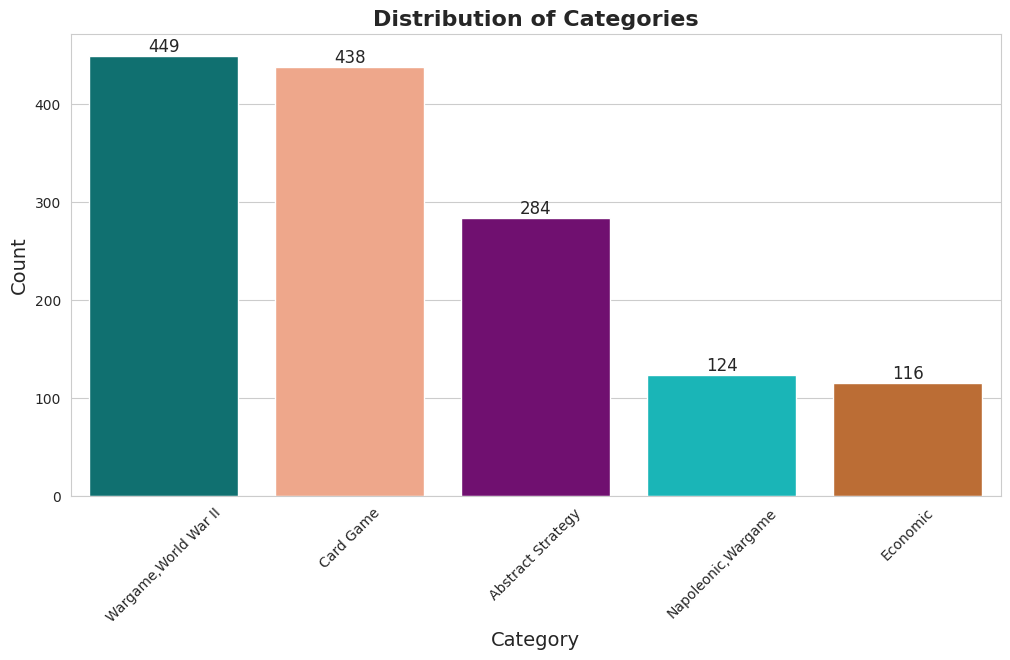

In [15]:
# Set a custom color palette
sns.set_palette(['#008080', '#FFA07A', '#800080', '#00CED1', '#D2691E'])

# Figure size 
plt.figure(figsize = (12,6))

# Plot a bar chart of the value counts
sns.barplot(x = value_counts_category.index, y = value_counts_category.values)


# Count numbers as labels
for i, val in enumerate(value_counts_category.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom',
             fontdict={'fontweight':500, 'size':12})

# Rotate the x-axis
plt.xticks(rotation=45)


# Add labels and title 
plt.xlabel('Category', size = 14, fontdict = {"fontsize":14})
plt.ylabel('Count', size = 14)
plt.title('Distribution of Categories', size = 16, fontweight = 'bold')


# Display the bars
plt.show()

The visualisation shows 5 the most friquent categories:
1. Wargame, World War 2 449
2. Card Game 438
3. Abstarct Straregy 284
4. Napoleonic, Wargame 124
5. Economic 116 

I decided to choose only 5 as the rest of the categories do not represent a significant difference. Based on it company can detect in what type of games players are more interested.

### 2.0.5  Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?
For this task I have time as a year. A need to find and compare the mean of time data. The data will be split into two different groups before 1992 and after 1992. The moving average is one of the techniques used to work with forecasting long-term trends. During that time board games became more popular and interesting. The trend should rise according to the last research. I will have a look to see it myself. 

In [16]:
b_games

,game_id,description,image,max_players,max_playtime,min_age,min_players,min_playtime,name,playing_time,...,artist,category,compilation,designer,expansion,family,mechanic,publisher,average_rating,users_rated
0,1,Die Macher is a game about seven sequential po...,//cf.geekdo-images.com/images/pic159509.jpg,5,240,14,3,240,Die Macher,240,...,Marcus Gschwendtner,"Economic,Negotiation,Political",NaN,Karl-Heinz Schmiel,NaN,"Country: Germany,Valley Games Classic Line","Area Control / Area Influence,Auction/Bidding,...","Hans im Glück Verlags-GmbH,Moskito Spiele,Vall...",7.66508,4498
1,2,Dragonmaster is a trick-taking card game based...,//cf.geekdo-images.com/images/pic184174.jpg,4,30,12,3,30,Dragonmaster,30,...,Bob Pepper,"Card Game,Fantasy",NaN,"G. W. ""Jerry"" D'Arcey",NaN,Animals: Dragons,Trick-taking,"E.S. Lowe,Milton Bradley",6.60815,478
2,3,"Part of the Knizia tile-laying trilogy, Samura...",//cf.geekdo-images.com/images/pic3211873.jpg,4,60,10,2,30,Samurai,60,...,Franz Vohwinkel,"Abstract Strategy,Medieval",NaN,Reiner Knizia,NaN,"Asian Theme,Country: Japan,Knizia tile-laying ...","Area Control / Area Influence,Hand Management,...","999 Games,ABACUSSPIELE,Astrel Games,Ceilikan J...",7.44119,12019
3,4,When you see the triangular box and the luxuri...,//cf.geekdo-images.com/images/pic285299.jpg,4,60,12,2,60,Tal der Könige,60,...,NaN,Ancient,NaN,Christian Beierer,NaN,"Country: Egypt,Promotional Board Games","Action Point Allowance System,Area Control / A...",KOSMOS,6.60675,314
4,5,"In Acquire, each player strategically invests ...",//cf.geekdo-images.com/images/pic342163.jpg,6,90,12,3,90,Acquire,90,...,"Scott Okumura,Peter Whitley",Economic,NaN,Sid Sackson,NaN,3M Bookshelf Series,"Hand Management,Stock Holding,Tile Placement","3M,Avalon Hill,Avalon Hill (Hasbro),Dujardin,G...",7.35830,15195
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10527,214996,Description from the publisher:&#10;&#10;Silve...,//cf.geekdo-images.com/images/pic3093082.png,2,480,12,1,30,"Silver Bayonet: The First Team in Vietnam, 196...",480,...,Charles Kibler,"Vietnam War,Wargame",NaN,"Gene Billingsley,Mitchell Land",NaN,GMT Operational System,Hex-and-Counter,GMT Games,8.35333,75
10528,215437,"Codex: Card-Time Strategy is a customizable, n...",//cf.geekdo-images.com/images/pic3290122.jpg,5,45,13,2,45,Codex: Card-Time Strategy – Core Set,45,...,NaN,"Card Game,Fantasy,Fighting,Video Game Theme",NaN,David Sirlin,Codex: Card-Time Strategy – Flagstone Dominion...,Fantasy Strike,"Deck / Pool Building,Hand Management,Variable ...",Sirlin Games,8.08780,82
10529,215471,Time to walk about town and take some pictures...,//cf.geekdo-images.com/images/pic3290975.png,4,20,12,2,20,Wind the Film!,20,...,宝井 貴子 (Takako Takarai),Card Game,NaN,Saashi,NaN,NaN,"Hand Management,Set Collection",Saashi & Saashi,7.28016,63
10530,216201,The race is on for the robots of the Robo Rall...,//cf.geekdo-images.com/images/pic3374227.jpg,6,120,12,2,20,Robo Rally (2016),120,...,NaN,"Miniatures,Racing,Science Fiction",NaN,Richard Garfield,NaN,Robots,"Action / Movement Programming,Grid Movement,Mo...","Avalon Hill (Hasbro),Hasbro",7.45871,341


In [17]:
b_games["year_published"]

0        1986
1        1981
2        1998
3        1992
4        1964
         ... 
10527    2016
10528    2016
10529    2016
10530    2016
10531    2016
Name: year_published, Length: 10532, dtype: int64

In [18]:
b_games["year_published"].describe()

count    10532.000000
mean      2003.070832
std         12.278296
min       1950.000000
25%       1998.000000
50%       2007.000000
75%       2012.000000
max       2016.000000
Name: year_published, dtype: float64

Visualistion used: 
- sns.histplot to visualise histogram
- sns.lineplot to visualise changes during the year in a line time by line
- sns.barplot to visualise changes during the year in a line time by charts

Text(0.5, 1.0, 'Number of the games during the period')

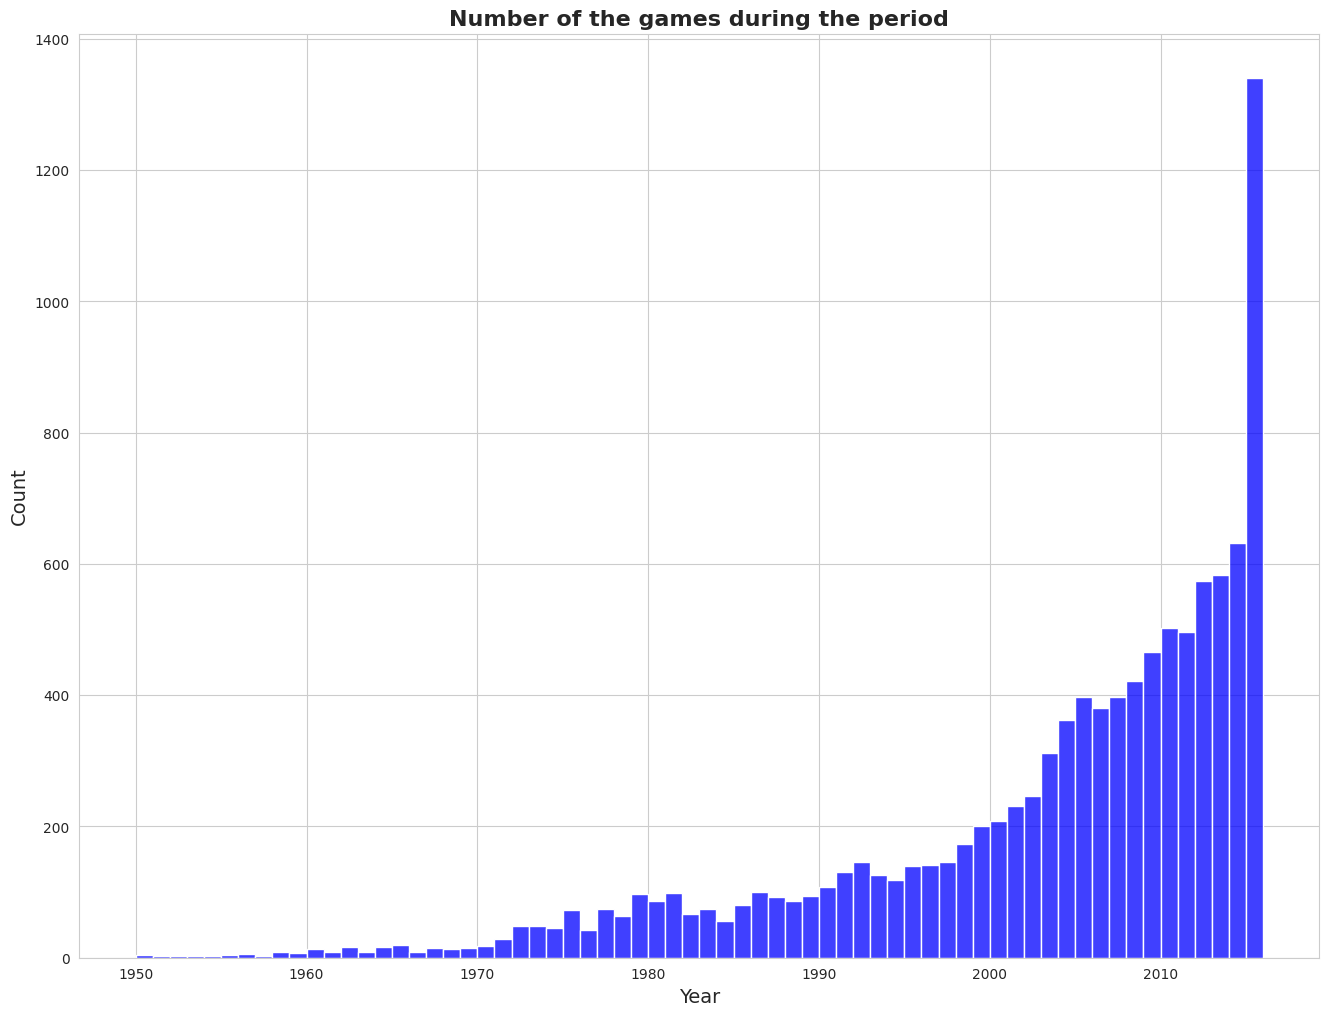

In [19]:
plt.figure(figsize = (16,12))

sns.histplot(b_games["year_published"], color = 'b', bins =66)

# Add labels and title 
plt.xlabel('Year', size = 14)
plt.ylabel('Count', size = 14)
plt.title('Number of the games during the period', size = 16, fontweight = 'bold')


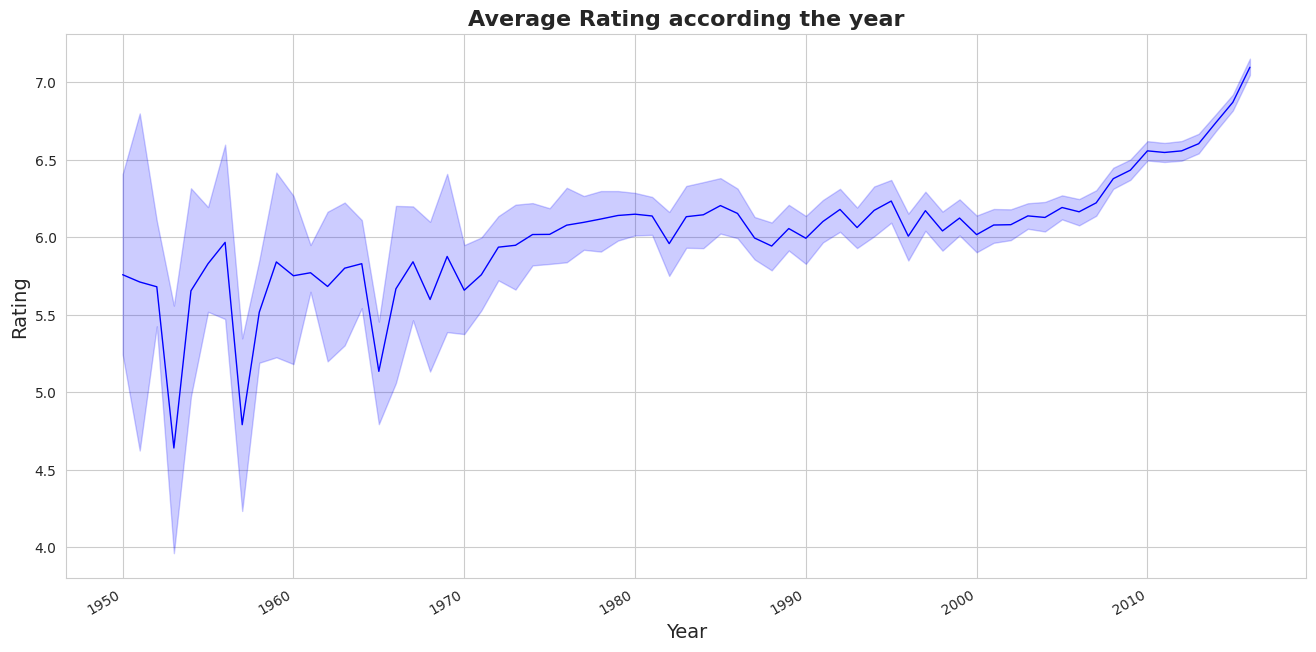

In [20]:
#plt.style.use('fivethirtyeight')
plt.figure(figsize = (16,8))
data=b_games

b_games.sort_values('year_published', inplace=True)

ax= sns.lineplot(data=b_games,x='year_published', y='average_rating', linestyle='solid', lw=1.0, color = 'b') 

plt.gcf().autofmt_xdate()

# Add titels and labels
plt.xlabel('Year', size=14)
plt.ylabel('Rating', size=14)
plt.title('Average Rating according the year', size = 16, fontweight = 'bold')

# display the time line
plt.show()

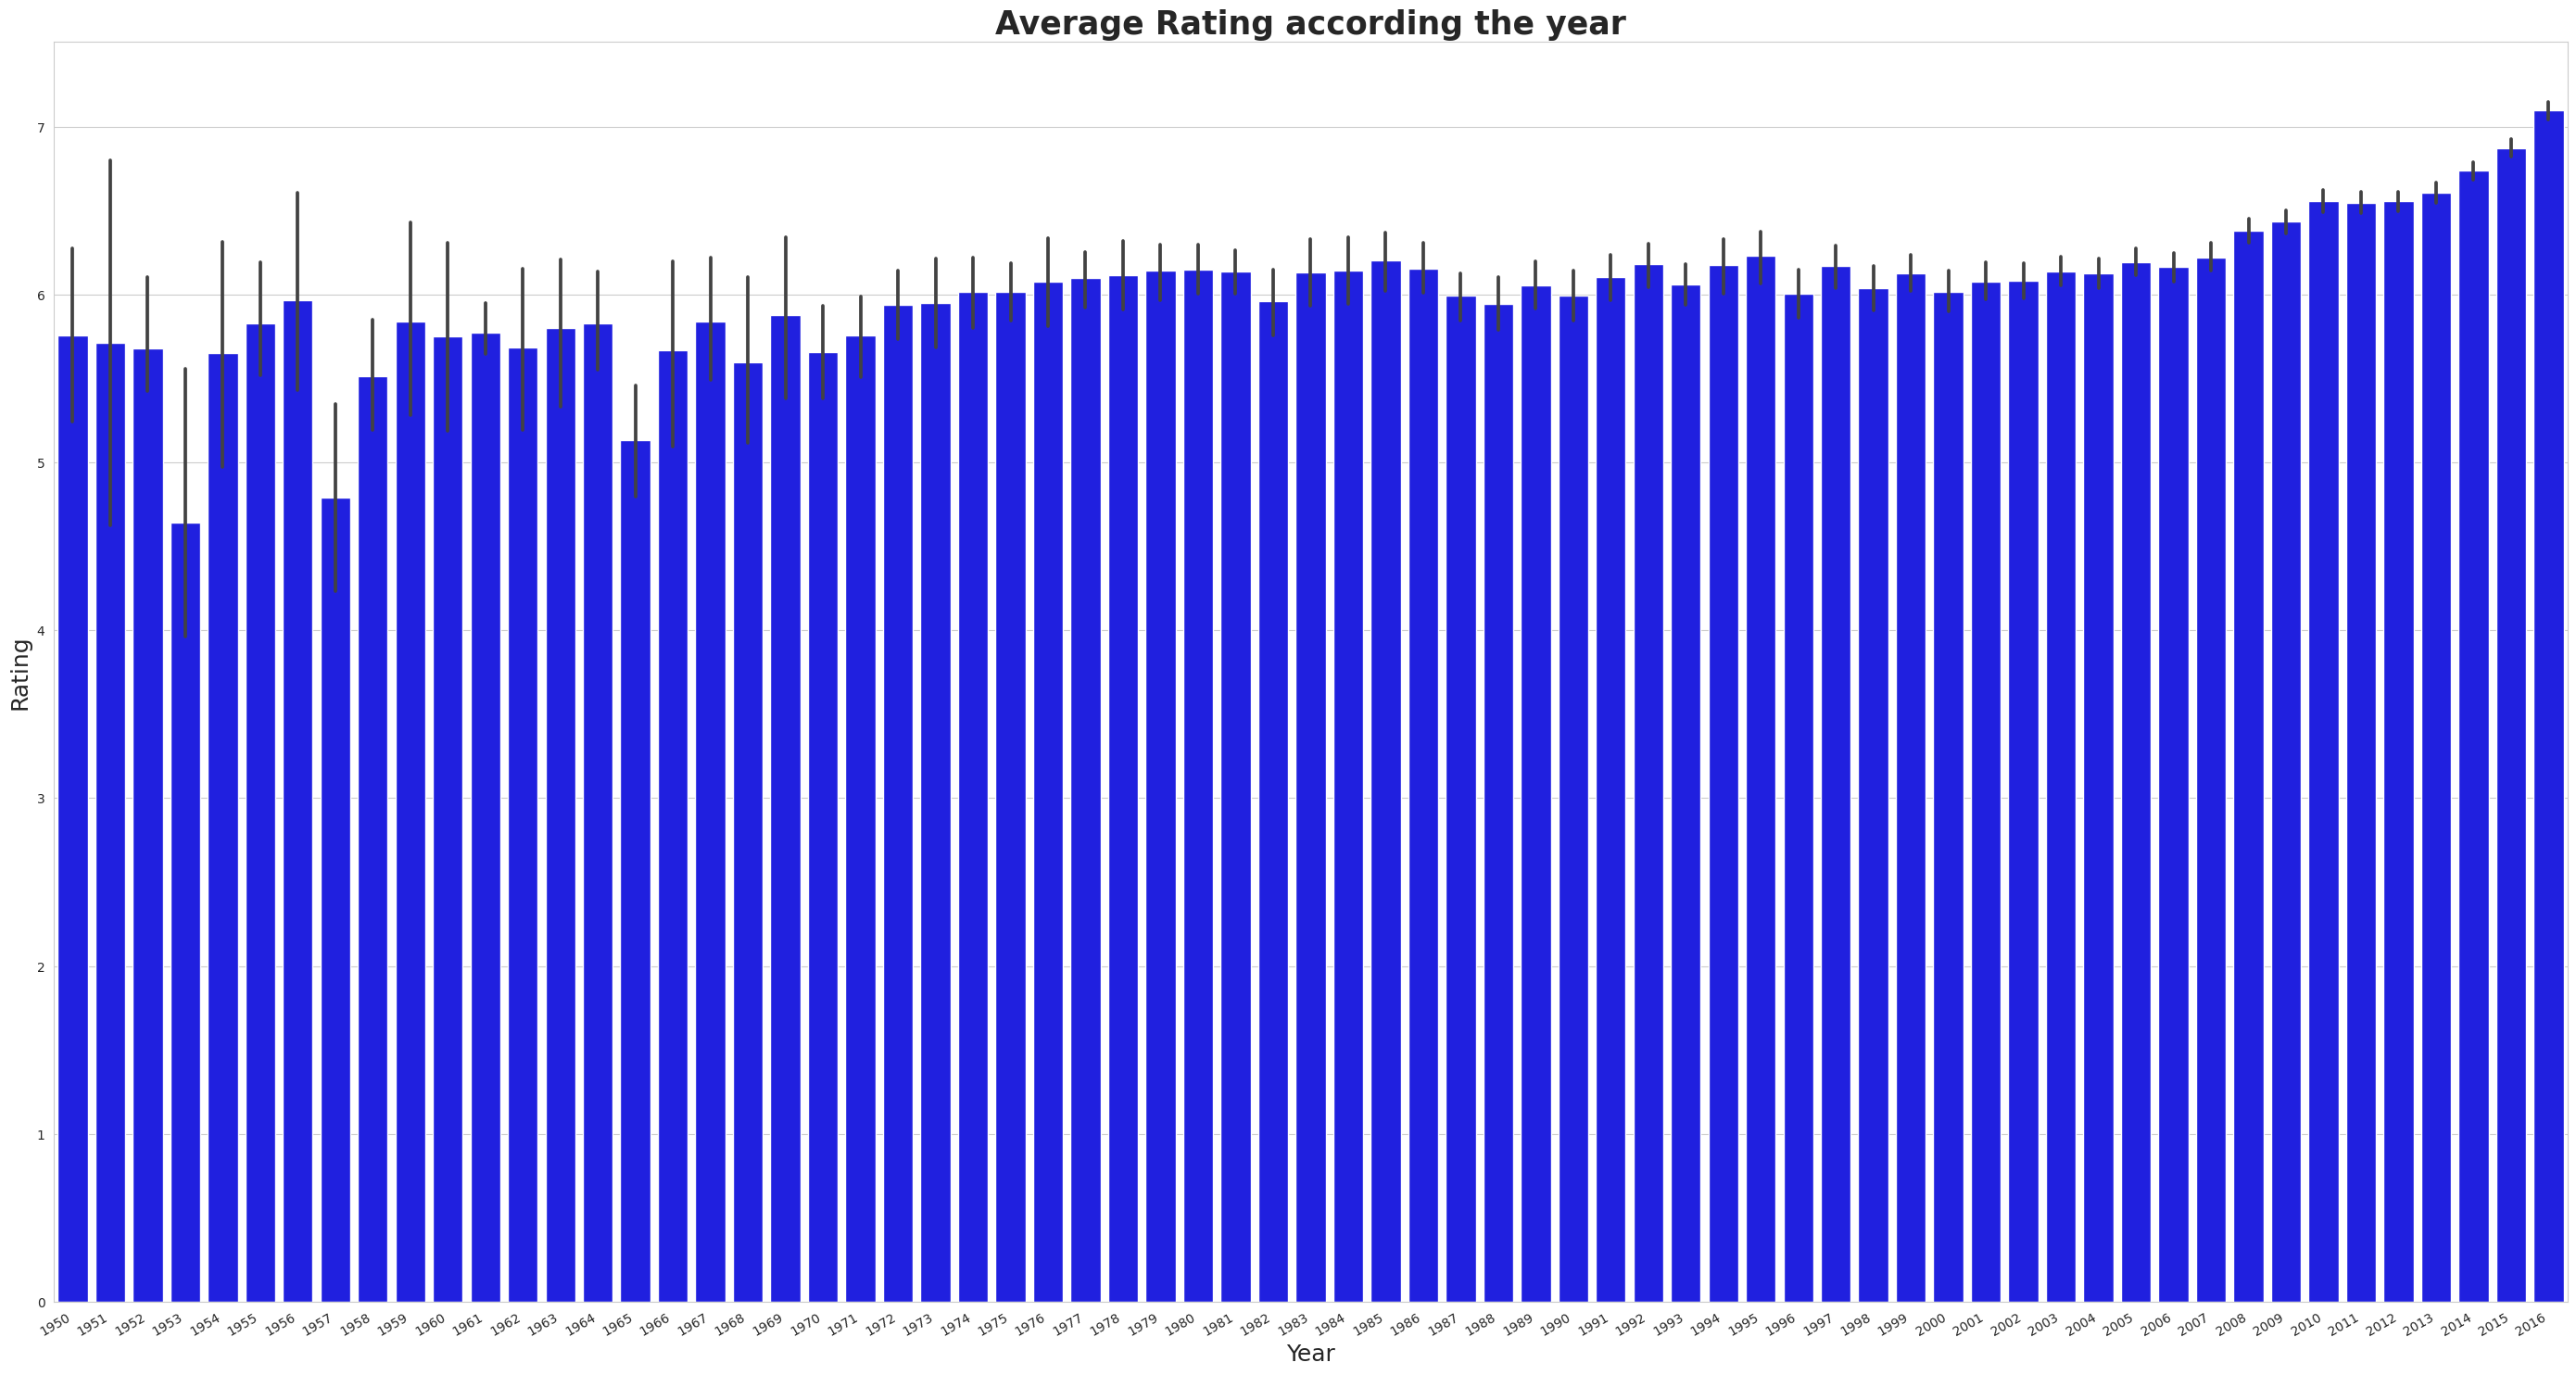

In [21]:
# Figure size
plt.figure(figsize = (35,20))
data=b_games

b_games.sort_values('year_published', inplace=True)

# Add labels and title
ax= sns.barplot(data=b_games,x='year_published', y='average_rating', color = 'b') 
plt.gcf().autofmt_xdate()

plt.xlabel('Year', size=18)
plt.ylabel('Rating', size=18)
plt.title('Average Rating according the year', size=25,fontweight = 'bold' )

# plot the bars
plt.show()


**Splitting the data into groups**


In [22]:
window = 4
b_games['rolling_mean'] = b_games['average_rating'].rolling(window=window).mean()


In [23]:
old_games = b_games[b_games['year_published'] <= 1992]
new_games = b_games[b_games['year_published'] > 1992]

old_rolling_mean = old_games['average_rating'].rolling(window=window).mean()
new_rolling_mean = new_games['average_rating'].rolling(window=window).mean()

old_mean = old_rolling_mean.mean()
new_mean = new_rolling_mean.mean()

print("Older games mean average rating:", old_mean)
print("Newer games mean average  rating:", new_mean)

Older games mean average rating: 6.035658546090109
Newer games mean average  rating: 6.446391650378128


In [24]:
#create a data frame
oldnew_games = pd.concat([old_games[['average_rating']], new_games[['average_rating']]], axis=1)
oldnew_games.columns = ['Games before 1992', 'Games after 1992']

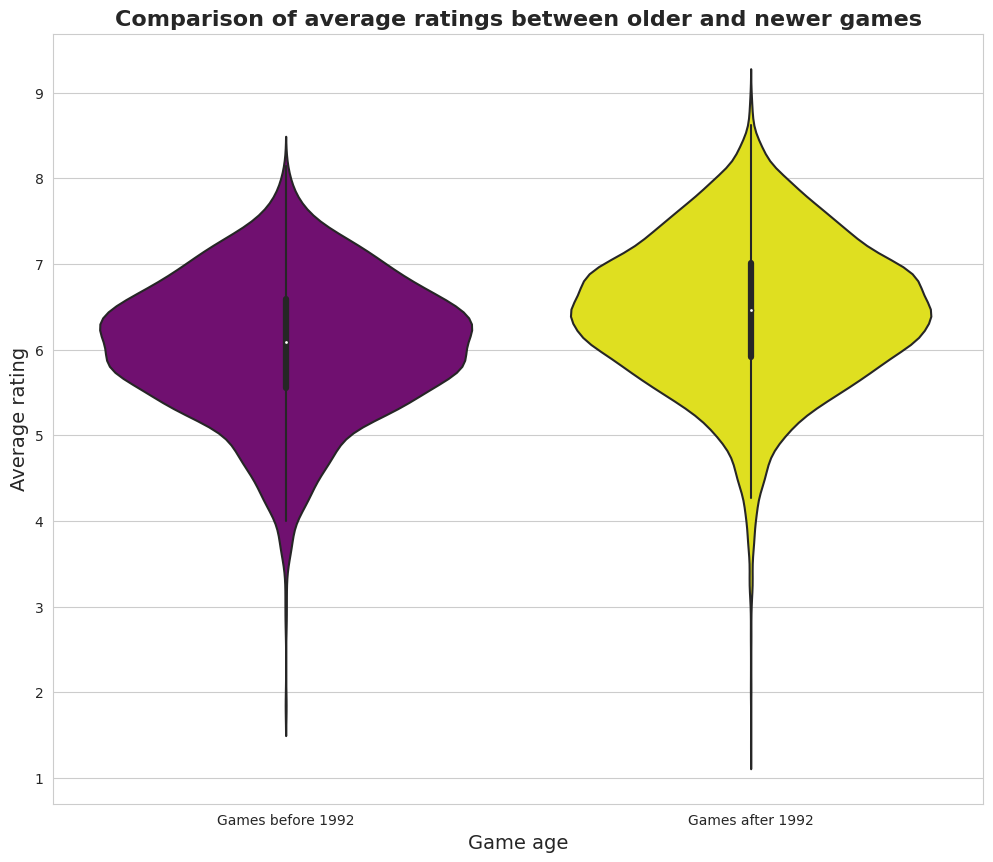

In [25]:
plt.figure(figsize = (12,10))

# Create a box plot
sns.set_palette(['purple','yellow'])
sns.violinplot(data=oldnew_games)

# Add labels and title
plt.xlabel('Game age', size=14)
plt.ylabel('Average rating', size = 14)
plt.title('Comparison of average ratings between older and newer games', size = 16, fontweight = 'bold')

# Show the plot
plt.show()

Mean average rating games before 1992: 6.03
Mean average rating games after 1992: 6.44
The mean difference between older games and newer games is 0.4. 

The first graph with the timeline is represent the average rating and the second is boxplot, violin plot and barplot. I have chosen violin as it also shows the distribution, and the difference between the groups and gives some esthetic for visualisation. 

We can see that the number of board games has risen. The same as the average rating. However, the difference in the rating is not significant. 


### What are the 3 most common “mechanics” in the dataset?  
I will find the most common mechanics of counting a number of values. It will give the values sorted in descending order and I will display only 3 of the most common mechanics.


In [26]:
b_games['mechanic']

2688                                        Set Collection
2074                                                   NaN
3133      Commodity Speculation,Dice Rolling,Stock Holding
2463     Area Movement,Pick-up and Deliver,Roll / Spin ...
662             Dice Rolling,Simultaneous Action Selection
                               ...                        
10481    Co-operative Play,Modular Board,Roll / Spin an...
10448                                     Pattern Building
10449                                    Co-operative Play
10444                Co-operative Play,Dice Rolling,Memory
10531                        Card Drafting,Hand Management
Name: mechanic, Length: 10532, dtype: object

In [27]:
b_games['mechanic'].isna().sum()

950

In [28]:
mechanics_counts = b_games["mechanic"].value_counts()
mechanics_counts

Hex-and-Counter                                                             523
Hand Management                                                             297
Dice Rolling                                                                222
Roll / Spin and Move                                                        199
Tile Placement                                                              170
                                                                           ... 
Card Drafting,Hand Management,Trick-taking,Variable Player Powers             1
Dice Rolling,Grid Movement,Pick-up and Deliver                                1
Action Point Allowance System,Area Movement,Dice Rolling,Hex-and-Counter      1
Hand Management,Point to Point Movement,Worker Placement                      1
Co-operative Play,Modular Board,Roll / Spin and Move,Set Collection           1
Name: mechanic, Length: 3209, dtype: int64

In [29]:
# Get the top 3 most common mechanics
top_mechanics = mechanics_counts.head(3)

# Print the top 3 most common mechanics
print(top_mechanics)

Hex-and-Counter    523
Hand Management    297
Dice Rolling       222
Name: mechanic, dtype: int64


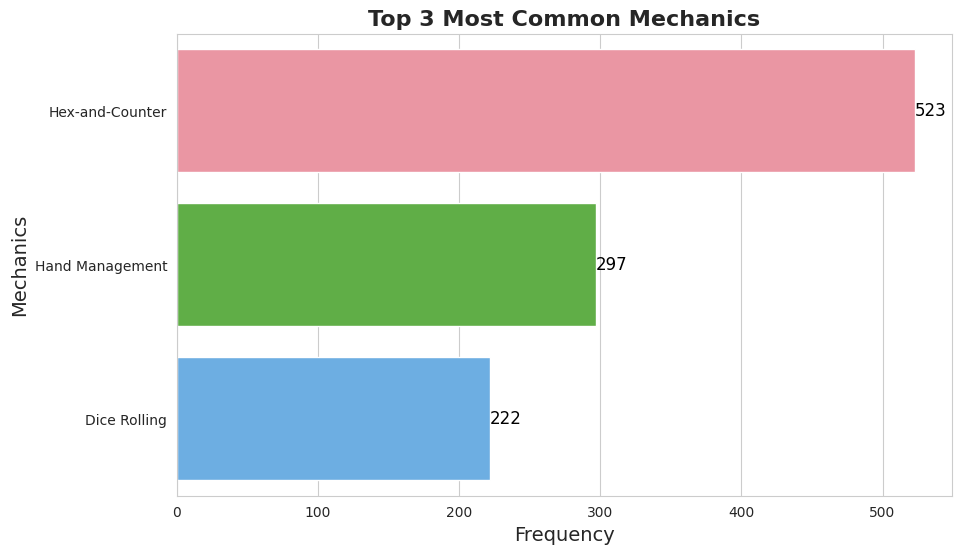

In [30]:
plt.figure(figsize = (10,6))

# Create a bar chart of the top 3 most common mechanics
sns.barplot(x=top_mechanics.values, y=top_mechanics.index)

# count the values of mechanics
for i, val in enumerate(top_mechanics.values):
    plt.text(val, i, str(val), color='black', ha='left', va='center', size=12)
    
sns.set_palette("Set2")

# Add labels and title to the plot
plt.title('Top 3 Most Common Mechanics',  size= 16, fontweight = 'bold')
plt.xlabel('Frequency',size= 14)
plt.ylabel('Mechanics',size= 14, fontdict = {"fontsize":14})


# Display the plot
plt.show()


1. Hex-and-Counter 523
2. Hand Management 295
3. Dice Rolling 222

We can see the most frequent mechanics in the dataset. This inside can be used for marketing strategy in order to know what mechanics are mostly preferred by the players. 



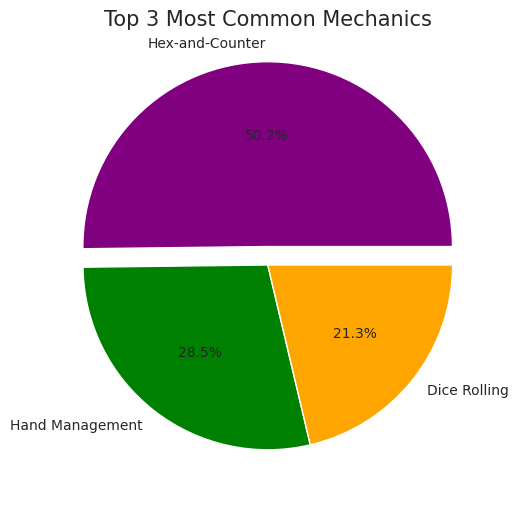

In [31]:
plt.figure(figsize = (12,6))

# Get the top 3 most common mechanics
top_mechanics = mechanics_counts.head(3)
#set the colors
colors = ['purple', 'green', 'orange']
#list of values for the explode parameter in a pie chart
myexplode =[0.1 if i == 0 else 0 for i in range(len(top_mechanics))]


# Create a pie chart of the top 3 most common mechanics
plt.pie(top_mechanics.values, labels=top_mechanics.index, autopct='%1.1f%%', colors=colors, explode = myexplode)

# Set the chart title
plt.title('Top 3 Most Common Mechanics',  size= 15)

# Show the chart
plt.show()

I also created a pie chart to visualise the outcome. I think it is also appropriate visualisation as it is clear to see the difference between the mechanics. In this case, the representation is in percentages.

Hex-and-Counter 50.2 % of the top mechanic Hand Management 28.5% of the top mechanic's Dice Rolling 21.3% of the top mechanics

This inside shows the difference between top mechanics. So the company can prioritise what mechanisms they would rather have.


# Part 2
You must answer a “Statistically Relevant” question, OF YOUR OWN CHOOSING, using the dataset, that has not been asked in Part 1. This must have a logical basis that enhances the information and insight gained in the scenario


#### The Most Rated Publisher
The most rated publisher can be useful inside for the company strategy as we can identify what publisher is most rated and what says that they are also frequently bought by the players. I will sort the values and count them, I will use a barplot for the visualisation. 

In [32]:
most_rated_publishers = b_games.groupby('publisher')['users_rated'].count().sort_values(ascending=False)[:5]
print(most_rated_publishers)

publisher
GMT Games                               180
SPI (Simulations Publications, Inc.)    128
Ravensburger Spieleverlag GmbH          103
Avalon Hill                             102
KOSMOS                                   74
Name: users_rated, dtype: int64


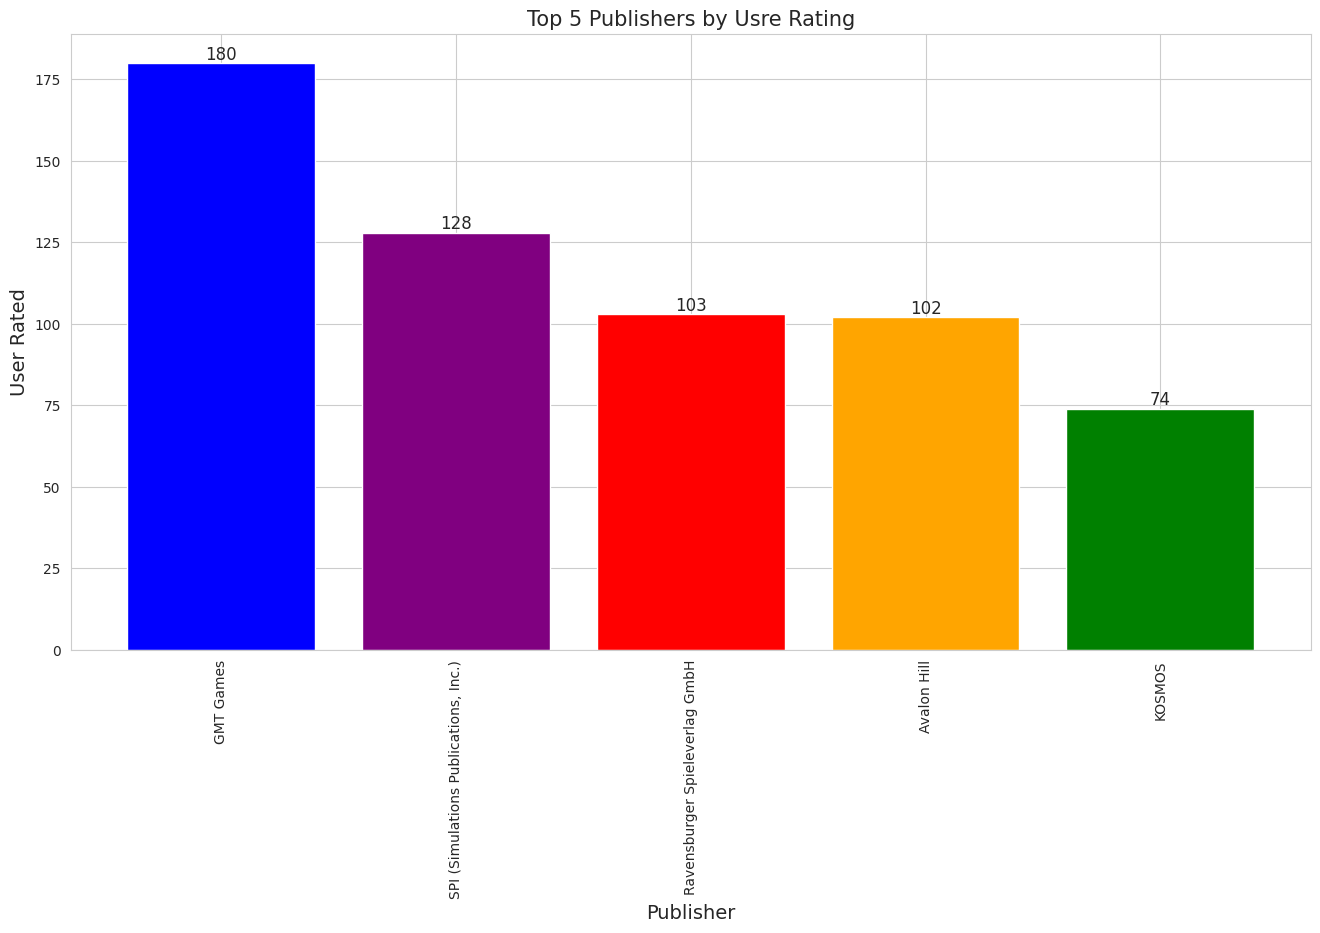

In [33]:
plt.figure(figsize = (16,8))
# Create the bar and set the colors
colors = ['blue','purple', 'red', 'orange', 'green']
plt.bar(most_rated_publishers.index, most_rated_publishers.values, color = colors)

for i, val in enumerate(most_rated_publishers.values):
    plt.text(i, val, int(val), horizontalalignment='center', verticalalignment='bottom',
             fontdict={'fontweight':500, 'size':12})

plt.xticks(rotation=90)
#  labels and title
plt.xlabel('Publisher',  size= 14,  fontdict = {"fontsize":14})
plt.ylabel('User Rated',  size= 14)
plt.title('Top 5 Publishers by Usre Rating',  size= 15)

# Show the plot
plt.show()

1. GMT Games 180
2. SPI 128
3. Ravensburger Spieevertlag GmbH 103
4. Avalon Hill 102
5. Kosmos 74

Those are the most-rated publisher among the players. We can say that the company produce good quality games and they might have a wide variety of games. I only display the top as it makes more sense. rest of the publishers overall have the same level of users who rated 


#### Which game in this dataset has the highest max_players value. 

On some online shops when we buy a game we can come across max and min players. I believe it can be a useful metric for the marketing strategy in order to know the auditory and display the information for the users. I will also group features such as max and min players and average ratings. I will find a mean of the features in order to calculate the statistic of each component. It allows us to analyse the data in detail.

I will use plotly library and I observed only the top 10 games with max players and an average rating of the game.


In [34]:
import plotly.express as px

top_10 = b_games.nlargest(10, 'max_players')

# Calculate the maen value rating, minimum number of players, 
#and maximum number of players for each game
game_stats = b_games.groupby('name')[['average_rating', 'min_players', 'max_players']].mean().reset_index()

fig = px.scatter(top_10, x='max_players', y='name', size='max_players', color='name',
                 hover_name='name', template='simple_white',
                 title='Top 10 Games with the Highest Max Players')

fig.update_layout(title_x=0.5, xaxis_title='Maximum Players', yaxis_title='Game Name', legend_title='Game Name')

fig.show()

The image display the games with the top 10 highest number of players. the same can be done with min payears as well. 
1. Start Player: A Kinda Collectible Card Game
2. I Do Not Know What I Want To Play ?
3. Scrimich Card. 
4. The Hummer of Thore: The Game of Norse Mythology
5. Linkee
6. Alchemidus
7. Dear in the HeadLights Game
8. Rapid Recall
9. Fairy Meat
10. Prawo Dzungli

It can be used for marketing to categorise games by the number of players and give recommendations for players if they want a game for small groups or big groups of people. For example in this case we can see the games which can be played by a very large groups of people. 


# Part 3
You must explain, in detail,    
•	why you chose a specific method to engineer the data and how you achieved this in python (Part 1/Part 2)  
•	why you chose your specific visualizations to illustrate each answer (Part 1/Part 2)  
•	what design decisions you made for each visualization (for example, but not only: colour, font, titles, size, text position, font size etc) (Part 1/Part 2)  
•	what your rationale is for the visualization created in Part 2 and how your question enhances the information and insight gained in the scenario (Part 2)  


##### Top 5 “average rated” games

The steps to solve the task
How could I sort the values from the most to the least. As I need to represent the features at a high rate. How can I represent the name rating as  “name” has multiple games?
I created variables which store sorted values by DESC order with the name of the games. I took the feathers with the highest rate and drop the columns where the name is repeated. Next step I performed visualisation. 

I used a method to sort values by average rating and the game's name. The values were sorted in DESC order. From the most rated to least rated.

- sort_vlaues() method sorts the DataFrame by the specified label. 

        (DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None))

- drop_duplicates() method Remove duplicate rows from the DataFrame. 

	- subset is parameter which identifiy column(s) to consider when identifying duplicate records
    
**Visualisation**

I choose a bar chart as it is very representative to visualise the number of values of categories and it is also representative to display the difference between them. It is clear to see how categories are sorted.  The use of colors helps to differentiate between the publishers and makes the chart more visually appealing. Overall, this visualization effectively conveys the important information in a clear and visually appealing way. The style is set to "whitegrid" and the color palette is set to "husl". The barplot shows the average rating on the x-axis and the game name on the y-axis. The title, x-label, and y-label are added. They are clear and concise, making it easy for the viewer to understand the purpose of the plot 


##### Correlation between the “users_rated” and the “max_playtime”
I used to approach this task in 2 different methods. However, the linear correlation representation was not representative of those features. The heat map was applied as an alternative to the linear correlation. It is the most appropriate method to visualise the correlation in this case. The heatmap shows no correlation between the features.  

 - sns.heatmap() function used to visualise values by colors.
       
        (data, *, vmin=None, vmax=None, cmap=None, center=None, robust=False, annot=None, fmt='.2g',   annot_kws=None, linewidths=0, linecolor='white', cbar=True, cbar_kws=None, cbar_ax=None, square=False, xticklabels='auto', yticklabels='auto', mask=None, ax=None, **kwargs)
        
        
**Visualisation**

A heat map is used as it shows a correlation between all features in the dataset. It highlights the level of correlation between features. Colourmap ("viridis") is also a good choice as it is perceptually uniform and makes it easier to distinguish between different levels of correlation. Is easy to find even by the colors if they're low, moderate or high correlation. The use of a mask to only show the lower triangle of the heatmap helps to avoid redundancy in the visualization. 


  
#####  Distribution of game categories

To find a distribution I need to know the amount values that features might have. The game category consists of text data and it represents the categories of the game. In order to know that I need to find what categories we have and count the number of these values. 
I used a method to count the values as it counts the unique number of rows. I took 5 categories to display. In the next step, I visualise the categories according to the values they have. 
 -  pd.DataFrame.value_counts
        DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)
        
 **Visualisation**

I applied different types of visualisation such as scatter plots and the bar chart.  The scatterplot did not work wor this visualisation well so I decided to work with a bar chart to visualise the distribution. Moreover, bar charts are mostly used in distribution visualisation. Rotating the x-axis tick labels by 45 degrees for readability, and setting labels and a title for the plot. I used palette  to customise the colors. The colors can be customised by the name of the color or the number of the color such as #1234. 

        
#####  Do older games (1992 and earlier) have a higher MEAN “average rating” than newer games (after 1992)?

I displayed the distribution of the data by year to become familiar with the data. I used visualisation to see how the number of games rating by each year has changed over time. To approach the task I split the date before and after 1992. I stored them in two different variables. I calculated the rolling mean to apply the moving average as we work with the time and the mean of it as well. I contacted them into a data frame and visualise. The difference is not significant as there were only a few years when the rating was down. 
 - numpy.mean() to calculate  the arithmetic mean
 -  rolling(window=window).mean() taking the average of the first k observations present in the current window and storing it in the list.
 
**Visualisation**

I used different techniques such as histogram, line plot and a violin plot. Histogram and line plot was used to see changes during the period. Blue color is chosen for the bars. The x-axis is rotated using plt.gcf().autofmt_xdate() to make the year labels easier to read. The title, x-axis label, and y-axis label are all given clear and concise labels with font size  respectively, to provide context and make it easy for the viewer to understand the plot. Overall, I tried to make design decisions to make the visualization visually appealing, easy to read, and understandable.

I chose to visualise the result violin plot to visualise the difference between the result as it shows the distribution of the features and shows the difference between them. The palette is set to use purple and yellow colors. The x-axis represents the age of the game (old or new), and the y-axis represents the average rating. Labels and a title are added to the plot to make information clear and understandable. 

 
#####   3 most common “mechanics” in the dataset
 
I approach this task as I did before. I counted values to define the most frequent features. By this method, we can count the number of values in mechanics. It is brought on top of the most frequent mechanics of the games.  I used  different visualisation to display features.
      
      DataFrame.value_counts(subset=None, normalize=False, sort=True, ascending=False, dropna=True)

**Visualisation**
I used different visualisation to test such as a bar chart and a pie chart. As it is used to visualise categories as well. And in this case, I have only 3 categories to display.
I used bars to display the number of values of the most rated features. I set the palette to "Set2" and counted the number of values by each mechanic. The title provides an understanding of the considered features and the label describes x and y-axis. The font size is set as bold and some labels have also been reconsidered. 

I believe in this case pie chart this visualisation is appropriate as it is clear to see the difference between the categories. It shows the percentage of the top 3 most common game mechanics in a pie chart format. The use of colors and explosion in the chart makes it easier to distinguish between the different mechanics. The autopct parameter adds the percentage of each mechanic to the chart. The title of the chart further enhances the understanding of the data being presented.

            
   
 #####  The most rated publisher

I was interested in who is the most-rated publisher of the games all of the period. This information could be important as the company can be focused on the publisher who is the most rated, which says that many people mostly buy the games from them. I also say about the quality of the game can be a good target for the company to implement its sales strategy. It's still important to research and read reviews. 

I used the method of a group to group publishers and users rated together I counted the values and ordered by DESC order. This method also counted the values and organises them. I just want to use a different approach to practice. I visualise the result with bar charts. 
- count() returns the number of elements with a specific value
- sort_vlaues() method sorts the DataFrame by the specified label
        
        (DataFrame.sort_values(by, *, axis=0, ascending=True, inplace=False, kind='quicksort', na_position='last', ignore_index=False, key=None))

**Visualisation** 
I used a bar chart to visualise the top-rated publisher as it is an appropriate visualisation of values and it represents names in order. It is clear to see what publishers are the most related by the users.  The bar chart is easy to read and understand, and it effectively communicates the top 5 publishers based on user ratings. Additionally, the use of colors helps to differentiate between the publishers and makes the chart more visually appealing. The code also includes labels for the x-axis, y-axis, and title, which provide context and help to explain the chart 



#### Which game in this dataset has the highest max_players value


The maximum number of players is important as it also gives some insights related to the target audience and discovering potential markets. The maximum number of players is important as it also gives some insights related to the target audience of a particular game and discovering potential markets. Target can be split into a small and large groups of people.  Some games can be more suitable for large parties and some of them can be good for couples and small groups.  

I used the Plotly library with Interactive charts and maps for Python. 
It creates line plots, scatter plots, area charts, bar charts, error bars, box plots, histograms, heatmaps, subplots, multiple-axes, polar charts, and bubble charts.

I used b_games.groupby() to find the statistical mean for max and min players, average rating. It will provide a detailed analysis.

I used  nlargest() method to sort values. It returns a specified number of rows, starting at the top after sorting the DataFrame by the highest value for a particular column.

With px.scatter, each data point is represented as a marker point, whose location is given by the x and y columns. In my case x is max_players and y is name of the game. 

**Viasualisation**

I used this type of visualisation as it allows us quickly to see the top 10 games with the maximum number of players. The use of plotly.express library makes it easy to create interactive and customizable visualisations. I used interactive visualisation as a small challenge to expand my knowledge.

The plot shows us the relation between max players and the names of the games. Bubbles change their size depending on the max and min number of players. Each game has it is own unique color. It is easy to display what type of game has the highest number of players and what is the entering number for this game.





# References: 

- GeeksforGeeks.(2021) How to Calculate Moving Averages in Python? GeeksforGeeks, [online] - Available at: https://www.geeksforgeeks.org/how-to-calculate-moving-averages-in-python/ [Accessed 11 April 2023].

- Board Gamer. (n.d.). Best Sellers [online] Available at: https://www.boardgamer.ie/collections/best-sellers# [Accessed 14 April 2023].

- Corey Schafer. (2019). pandas DataFrame: Sort Rows. [video] Available at: https://www.youtube.com/watch?v=1uV_K9GkC-o [Accessed 11 April 2023].

- Corey Schafer. (2019). pandas Sort: Your Guide to Sorting Data in Python. [video] Available at: https://www.youtube.com/watch?v=Zs_C41bSw3o [Accessed 11 April 2023].

- Datagy. (2021). Pandas Drop Duplicates - Step-By-Step Guide with Examples. [online] Datagy. Available at: https://datagy.io/pandas-drop-duplicates/ [Accessed 11 April 2023].

 
- Investopedia. (n.d.). Moving Average (MA): Purpose, Uses, Formula, and Examples.
[online] Available at: https://www.investopedia.com/terms/m/movingaverage.asp [Accessed 11 April 2023].

- IGN.(n.d.)The Best Board Games for Parties and Large Groups (2023). [online] Available at: https://www.ign.com/articles/best-board-games-for-parties-and-large-groups [Accessed 15 April 2023].

- Fortune. (n.d.) Board Games Market Size, Industry Share [online] Available at: https://www.fortunebusinessinsights.com/board-games-market-104972. [Accessed 12 April 2023].

- GeeksforGeeks. (2022). How to display the value of each bar in a bar chart using Matplotlib? [online] Available at: https://www.geeksforgeeks.org/how-to-display-the-value-of-each-bar-in-a-bar-chart-using-matplotlib/ [Accessed 18 April 2023].

- NumPy. (2021). numpy.mean. [online] Available at: https://numpy.org/doc/stable/reference/generated/numpy.mean.html [Accessed 11 April 2023].

- Onyejiaku Theophilus Chidalu. How to explode a pie chart using Matplotlib in Python.. [online] Available at: https://www.educative.io/answers/how-to-explode-a-pie-chart-using-matplotlib-in-python [Accessed 12 April 2023].

- Pandas. (n.d.). pandas.DataFrame.sort_values. pandas. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.sort_values.html [Accessed 11 April  2023].

- Plotly. (n.d.). plotly.express.scatter. [online] Available at: https://plotly.com/python-api-reference/generated/plotly.express.scatter [Accessed 15 April 2023].
- Plotly. (n.d.). Plotly Open Source Graphing Library for Python. [online] Available at: https://plotly.com/python/ [Accessed 15 April 2023].

- Plotly. (n.d.). Scatter plots in Python. [online] Available at: https://plotly.com/python/line-and-scatter/ [Accessed 16 April 2023].

- Pandas. (2021). pandas.DataFrame.value_counts() method. pandas 1.3.3 documentation. [online] Available at: https://pandas.pydata.org/pandas-docs/stable/reference/api/pandas.DataFrame.value_counts.html [Accessed 11 April 2023].
 
- Spencer Guy. (n.d.). pandas Sort: Your Guide to Sorting Data in Python. [online] Available at: https://realpython.com/pandas-sort-python/ [Accessed 12April 2023].

- Seaborn. (n.d.). seaborn.heatmap. [online] Available at: https://seaborn.pydata.org/generated/seaborn.heatmap.html [Accessed 12 April 2023].

- Statista.(2022)Global board games market value 2017-2023. [online] Available at: https://www.statista.com/statistics/1317823/board-game-participation-level-us/ [Accessed 13 April 2023].

- W3Schools. (n.d.). Pandas DataFrame nlargest() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_nlargest.asp [Accessed 17 April 2023].

- w3schools. (n.d.). Pandas drop_duplicates() Method. [online] Available at: https://www.w3schools.com/python/pandas/ref_df_drop_duplicates.asp [Accessed 17 April  2023].

- Jaclyn Peiser. (2022). Why board games are quickly regaining popularity. [online] Available at: https://www.washingtonpost.com/business/2022/12/24/board-game-popularity/ [Accessed 17 April 2023].
